In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1 Sampling from distributions
Generate 10000 samples by `np.random.randn`

In [52]:
# YOUR ANSWERS HERE
samples = np.random.randn(10000)
print(samples.shape)

(10000,)


Estimate the probability density function by the samples. Hint: use ` np.histogram ` and remember the PDF should integrate to 1.

Text(0, 0.5, 'P(x)')

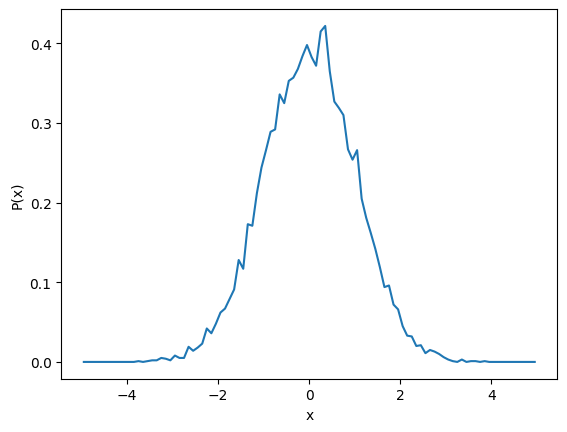

In [57]:
# # YOUR ANSWERS HERE
freq, bins = np.histogram(samples, 100, (-5, 5), density=False)  # TODO: histogram with 100 bins, range -5 to 5


bin_size =  bins[1] - bins[0]  # TODO: compute bin size
xgrid = bins[:-1] + bin_size / 2 # TODO: compute bin centers
pdf = freq / (freq.sum() * bin_size)
freq.shape, xgrid.shape
plt.plot(xgrid, pdf)
plt.xlabel("x")
plt.ylabel('P(x)')

Compare your estimation with the ground true PDF of `np.random.randn`

Text(0.5, 0, 'x')

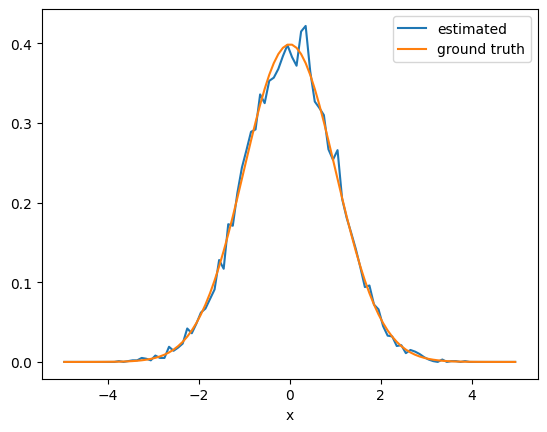

In [59]:
# YOUR ANSWERS HERE
def real_pdf(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(- (x ** 2) / 2)
plt.plot(xgrid, pdf, label="estimated")
plt.plot(xgrid, [real_pdf(x) for x in xgrid], label='ground truth')
plt.legend()
plt.xlabel("x")

Show how the deviation between your estimation and ground true changes with the sample size

Text(0.5, 0, 'x')

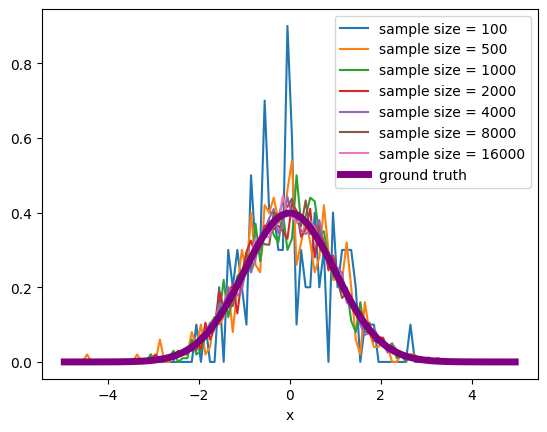

In [61]:
# YOUR ANSWERS HERE
sample_sizes = [100, 500, 1000, 2000, 4000, 8000, 16000]

for sample_size in sample_sizes:
    samples = np.random.randn(sample_size)
    freq, bins = np.histogram(samples, 100, (-5, 5), density=True)  # TODO: histogram
    bin_size = bins[1] - bins[0]
    plt.plot(xgrid, freq, label=f"sample size = {sample_size}")

plt.plot(xgrid, [real_pdf(x) for x in xgrid], label='ground truth', lw=5, c='purple')
plt.legend()
plt.xlabel("x")

# Exercise 2 Marginal & Conditional Probability Densitites

Load the file `pmf2Dexample.mat`, which contains a discrete 2D probability mass function (PMF). The variables defined include:

$\quad$ `x` = a vector of $x$ points

$\quad$ `y` = a vector of $y$ points

$\quad$ `Pxy` = a 2D matrix, whose $i, j$ 'th entry is the probability $P(y = {\tt y[i]}, x = {\tt x[j]})$

You can visualize this density in Python via the command:
`plt.imshow`

In [62]:
# Import a file from github using 'wget'
!wget https://github.com/pillowlab/neu314data/blob/main/pmf2Dexample.mat?raw=true

# Rename raw files with the mv utility
!mv pmf2Dexample.mat\?raw\=true pmf2Dexample.mat

/bin/bash: wget: command not found
mv: rename pmf2Dexample.mat?raw=true to pmf2Dexample.mat: No such file or directory


if the above block doesn't work, try manually download the data file and put the data file in the same directory as this notebook

In [63]:
from scipy.io import loadmat
data = loadmat("pmf2Dexample.mat")
Pxy = data["Pxy"]
x = data["x"]
y = data["y"]

Text(0, 0.5, 'y')

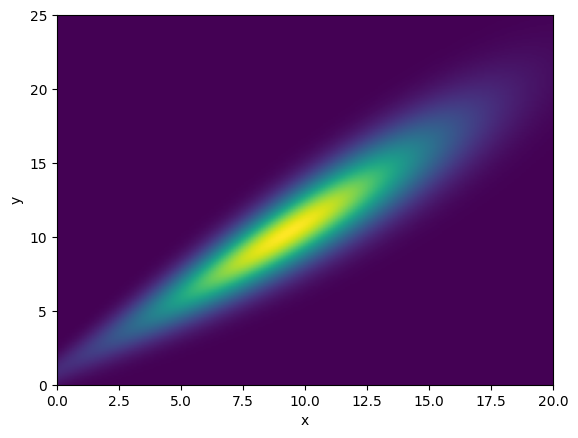

In [77]:
xlim = np.array([0, 20])  # axis limits for x variable
ylim = np.array([0, 25])  # axis limits for y variable

plt.imshow(
    Pxy, aspect="auto", origin="lower", extent=[xlim[0], xlim[1], ylim[0], ylim[1]]r
)
plt.xlabel("x")
plt.ylabel("y")

From this joint two-dimensional distribution, compute and make plots (or images) of the following.




$P(x)$ : The marginal probability distribution over $x$.

(250, 200) (250, 1)


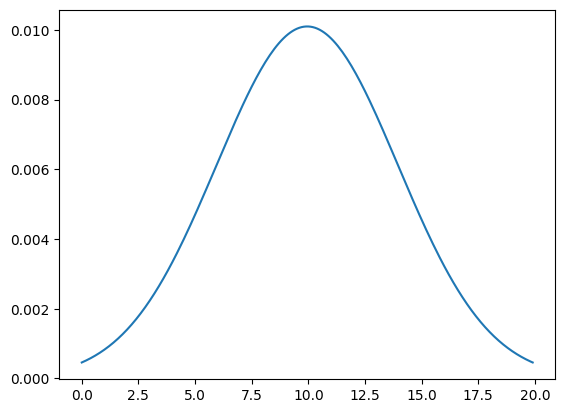

In [84]:
# YOUR ANSWERS HERE
print(Pxy.shape, y.shape)
# TODO: sum over y-axis (axis=0) to get Px
Px = Pxy.sum(0)
# TODO: plot Px vs x
plt.plot(x, Px)


$P(y)$ : The marginal probability distribution over $y$.

Text(0, 0.5, 'p(y)')

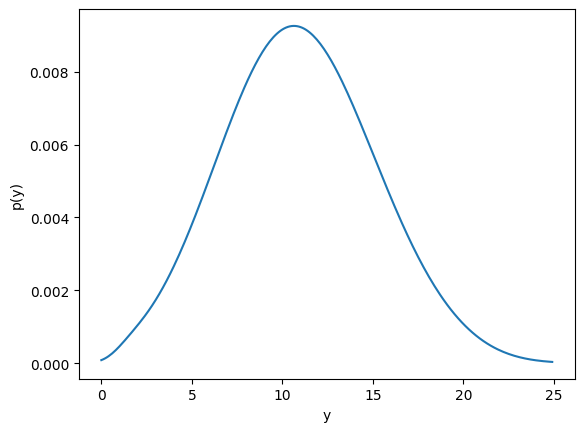

In [85]:
# YOUR ANSWERS HERE
# TODO: sum over x-axis (axis=1) to get Py
Py = Pxy.sum(1)
# TODO: plot Py vs y
plt.plot(y, Py)
plt.xlabel('y')
plt.ylabel('p(y)')

$P(y\,|\,x=5)$ : the conditional over $y$ given $x=5$

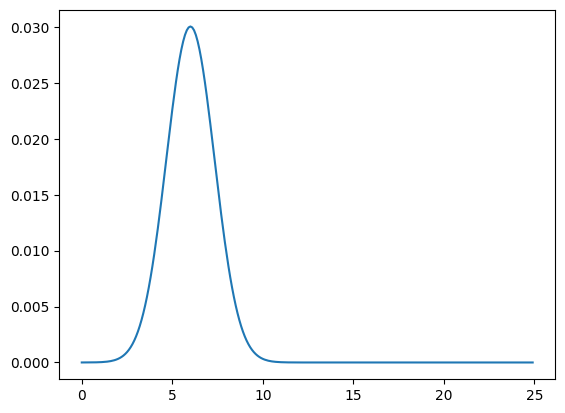

In [107]:
# YOUR ANSWERS HERE
# TODO: find index of x closest to 5
def find_index(x_value, x):
    return np.argmin(np.abs(x_value - x))

x_condition = 5
col_idx = find_index(x_condition, x)

# TODO: select column from Pxy for this x and normalize it

Pycx = Pxy[:, col_idx] / Pxy[:, col_idx].sum()

# TODO: plot Pycx vs y

plt.plot(y, Pycx)

 $P(x\,|\,y)$ : the full image of the conditional density $P(x\,|\,y)$

In [98]:
np.column_stack([Py for _ in range(200)])

(250, 200)

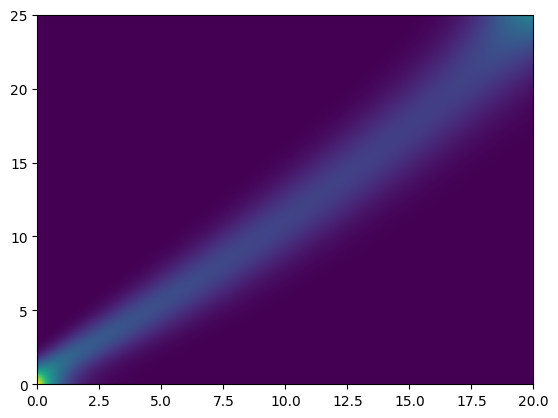

In [111]:
# YOUR ANSWERS HERE
# TODO: tile Py so it matches shape of Pxy for division
Py_tile = np.column_stack([Py for _ in range(200)])

# TODO: compute P(x|y) as Pxy divided by Py_tile
P_x_given_y = Pxy / Py_tile
P_x_given_y = P_x_given_y / P_x_given_y.sum()

# TODO: plot P(x|y) as an image with imshow, using same extent/aspect/origin as before

plt.imshow(P_x_given_y, aspect="auto", origin="lower", extent=[xlim[0], xlim[1], ylim[0], ylim[1]])

# Exercise 3 Mean, Variance, Independence

Two common statistics one might wish to compute from a distribution are its mean and variance.  

- The *mean* is the mean or average value, given by $\mathbb{E}[x] = \int x P(x) dx$ when $P(x)$ is a pdf, and $\mathbb{E}[x] = \sum_{i} x_i P(x_i)$ when $P(x)$ is a pmf.
- The *variance* is the mean value of $x$ minus its mean squared:  $\mathrm{var}(x) = \mathbb{E}[(x - \mathbb{E}[x])^2] = \sum_i (x_i - \bar x)^2 P(x_i)$


Compute the mean and variance of the marginal distribution $P(x)$.


In [125]:
# TODO: Your code here!
mean_x = np.sum(x * Px)
variance_x = np.sum(((x - mean_x) ** 2) * Px)

print(f"Mean of P(x): {mean_x}")
print(f"Variance of P(x): {variance_x}")

Mean of P(x): 1990.0
Variance of P(x): 784126267.0


Compute the mean and variance of the conditional distribution $P(x | y = 3)$.

In [138]:
# TODO: Your code here!
y_target = 3
y_index = find_index(y_target, y) # TODO: find index of y closest to y_target

Px_given_y3 = Pxy[y_target] # TODO: extract conditional Px|y=3 from Pxy

# TODO: normalize Px_given_y3 so it sums to 1
Px_given_y3 = Px_given_y3 / Px_given_y3.sum()

# TODO: compute mean_x_given_y3
mean_x_given_y3 = np.sum(x * Px_given_y3)

# TODO: compute variance_x_given_y3
variance_x_given_y3 = np.sum((x - mean_x_given_y3) ** 2 * Px_given_y3)

print(f"Mean of P(x | y=3): {mean_x_given_y3}")
print(f"Variance of P(x | y=3): {variance_x_given_y3}")


Mean of P(x | y=3): 1990.0
Variance of P(x | y=3): 784126267.0


It is clear from the image of $P(x,y)$ shown above that $x$ and $y$ are correlated, and thus $P(x,y)$ is not independent. However, we can construct an independent approximation to the distribution by taking the product of the marginals.

$$P_{indep}(x,y) = P(x) P(y)$$

Compute $P_{indep}$, defined above. Then make an image plot showing $P_{indep}$, similar to the one used to depict the original distribution.

Text(0, 0.5, 'y')

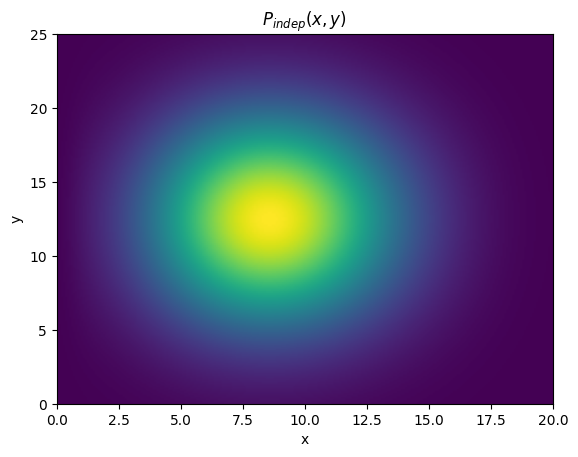

In [143]:
# TODO: Your code here!
# TODO: compute P_indep(x, y) = P(x) * P(y) using outer product
P_indep = np.outer(Px, Py)
# TODO: plot P_indep as image (use same style as for Pxy)
plt.imshow(P_indep, aspect='auto', origin="lower", extent=[xlim[0], xlim[1], ylim[0], ylim[1]])
plt.title('$P_{indep}(x, y)$')
plt.xlabel('x')
plt.ylabel('y')

Recall that an alternate definition of independence is that all conditional distributions are the same. Verify that the distribution $P_{indep}$ is indeed independent by computing and plotting two conditionals, $P_{indep}(x | y = 5)$ and $P_{indep}(x | y = 20)$ on the same set of axes, and showing that they agree.

In [145]:
P_indep.shape

(200, 250)

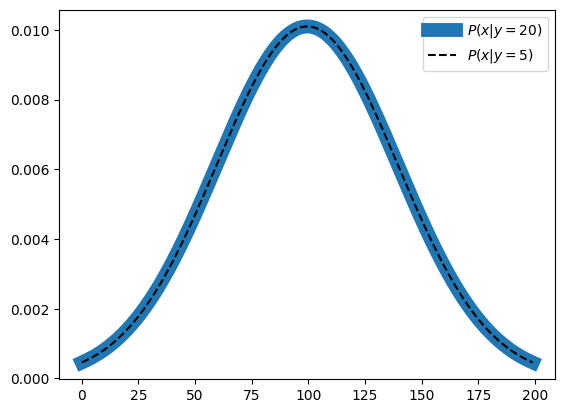

In [153]:
# TODO: Your code here!
# TODO: compute Px_given_y5_indep
y_index_5 = np.argmin(np.abs(y - 5))
Px_given_y5_indep = P_indep[:, y_index_5] / P_indep[:, y_index_5].sum()

# TODO: compute Px_given_y20_indep
y_index_20 = np.argmin(np.abs(y - 20))
Px_given_y20_indep = P_indep[:, y_index_20] / P_indep[:, y_index_20].sum()

# TODO: plot both conditionals on same axes
plt.plot(Px_given_y20_indep, lw=10, label='$P(x | y=20)$')
plt.plot(Px_given_y5_indep, ls='--', c='black', label='$P(x | y = 5)$')
plt.legend()

# Exercise 4 Multivariate Gaussian

Generate 10000 samples from a 2D Gaussian distribution with mean `[0,0]` and covariance `[[2,0.5],[0.5,1]]`. Hint: use `np.random.multivariate_normal`

In [156]:
# YOUR ANSWERS HERE
mean = np.array([0, 0])
covariance = np.array([[2, 0.5], [0.5, 1]])
samples = np.random.multivariate_normal(mean, covariance, 10000)

Check the covariance of the sample and compare it with ground true covariance

In [164]:
# YOUR ANSWERS HERE
sample_cov = np.cov(samples.T)  # TODO: np.cov()
sample_cov, covariance

(array([[1.97961743, 0.51721023],
        [0.51721023, 1.02897605]]),
 array([[2. , 0.5],
        [0.5, 1. ]]))

Estimate the probability density function by the samples. Hint: use np.histogram2d and remember the PDF should integrate to 1.

In [189]:
pdf.sum()

np.float64(127.4992635900979)

127.4992635900979


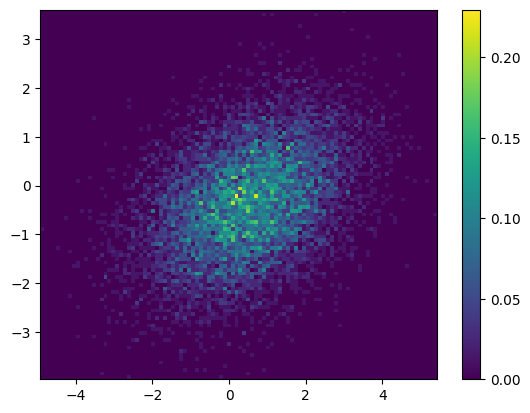

In [194]:
# YOUR ANSWERS HERE
freq, xx, yy = np.histogram2d(samples[:, 0], samples[:, 1], bins=100)  # TODO: np.histogram2d(..., bins=100)
dx = np.diff(xx)[0]
dy = np.diff(yy)[0]
bin_area = dx * dy
pdf = freq / (freq.sum() * bin_area)
plt.imshow(pdf, aspect='auto', origin='lower', extent=[xx[0], xx[-1], yy[0], yy[-1]])
plt.colorbar()
print(np.sum(pdf))

Sample several vectors with length 500 from a multivariate Gaussian with mean zero (zero vector of lenght $500$) and identity matrix (of size 500$\times$500) covariance. Plot the vectors.

In [ ]:
# YOUR ANSWERS HERE
mean = np.zeros(500)
covariance = np.eye(500)
samples = ____
for i in range(len(samples)):
    plt.plot(samples[i])

Everything is the same as the above question, but the covariance matrix is set to be $C_{ij}=i*j$. Plot the vectors

In [ ]:
# YOUR ANSWERS HERE
mean = ____
covariance = ____
samples = ____
for i in range(len(samples)):
    plt.plot(samples[i])

Everything is the same as the above question, but the covariance matrix is set to be $C_{ij}=\exp(-0.001*(i-j)^2)$. Plot the vectors

In [ ]:
# YOUR ANSWERS HERE
mean = ____
covariance = ____
samples = ____
for i in range(len(samples)):
    plt.plot(samples[i])

Covariance matrix is set to be $C_{ij}=\exp(-\sin^2(0.1*|i-j|))$. Plot the vectors

In [ ]:
# YOUR ANSWERS HERE
mean = ____
covariance = ____
samples = ____
for i in range(len(samples)):
    plt.plot(samples[i])


# Exercise 5 Bayes theorem

Consider a mouse in an experimental box, with two levers to choose from, one foor food, and another for water.
We want to know what the mouse's preference for water is on a particular day of the week. We will use bernoulli distribution to model the mouse's preference. Let's denote $P(water)=\theta$ and $P(food)=1-\theta$. Our goal is to inference $\theta$ based on the observed data. About the data, we will code choose for water as $1$ and food as $0$, so the data $d$ looks like $d=(0,1,0,1,1,1,1,\dots)$.

The goal is calculate
$$p(\theta | d) = \frac{P(d | \theta) P(\theta)}{\int P(d | \theta) P(\theta) \mathop{d \theta}}$$

In order to calculate the integral numerically, we are going to digitze $\theta$ into $N$ bins with width $\Delta_\theta$, then
$$
P(d)= \int P(d | \theta) P(\theta) \mathop{d \theta} \approx \sum_{j=1}^{N} P(d | \Delta_\theta*j) P(\Delta_\theta*j) \Delta_{\theta}
$$


Let's say we've observed the mouse's choices on previous days, and have counted the number of times it choose water and the number of times it choose food. With that information we assign a prior distribution to $P(\theta)$. Out of 86 choices it chose water 35 times, and food 51 times. We'll use this information to create a prior distribution for $\theta$ below



Text(0.5, 1.0, 'prior')

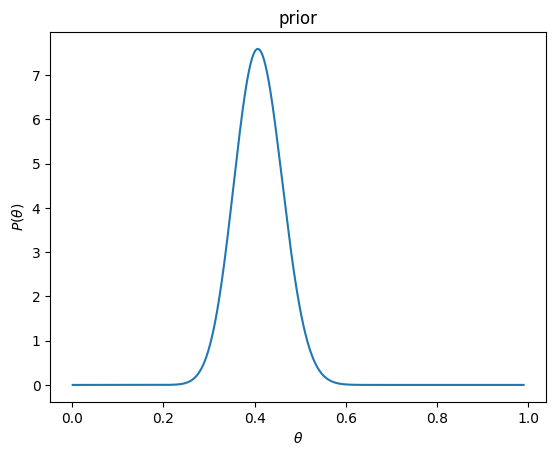

In [203]:
from scipy.stats import bernoulli,beta

true_water_pref = 0.56 # ground truth
np.random.seed(45)
data = bernoulli(p=true_water_pref).rvs(100) # generate some data from the ground truth

prior_water_choices = 35
prior_total_choices = 86
prior_food_choices = prior_total_choices - prior_water_choices
prior = lambda x: beta(prior_water_choices+1, prior_food_choices+1).pdf(x)
# Prior is a beta distribution
# Ask ChatGPT why we set our prior like this if interested

thetas = np.linspace(0.001, 0.99, 2000) #assume a discrete grid of theta for visualization
all_prior=prior(thetas)
plt.plot(thetas,all_prior)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\theta)$")
plt.title("prior")

At what value of $\theta$ is $P(\theta)$ maximized? What will happen to the prior if we double `prior_water_choices` and `prior_total_choices`?

Text(0.5, 1.0, 'prior')

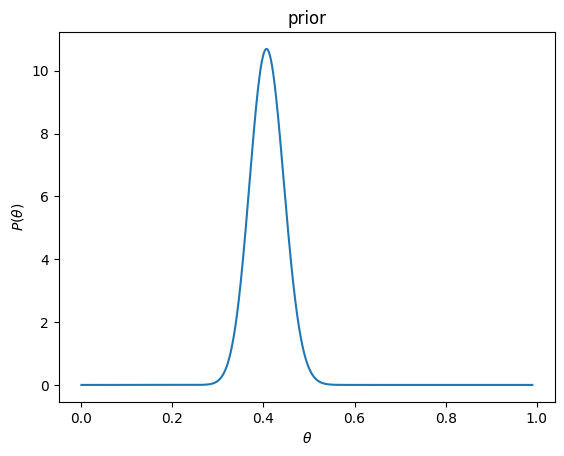

In [204]:
# YOUR ANSWERS HERE
new_prior_water_choices = 35*2
new_prior_total_choices = 86*2
new_prior_food_choices = new_prior_total_choices - new_prior_water_choices
new_prior = beta(new_prior_water_choices+1, new_prior_food_choices+1)
plt.plot(thetas,new_prior.pdf(thetas))
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\theta)$")
plt.title("prior")

**Likelihood**

When you have an array of data points as we do, how do we compute $P(d | \theta)$? The first thing to realize is that $P(d | \theta)$ is a shortened version of:

$$P(0, 1, 1, 0, 1, 1, 0, 1, 0, 1, ... | \theta)$$

additionally we make an assumption of independence and identitically distributed. This means that we are assuming each sample uses the same distributtion for it's likelihood function, and that each sample is independent of one another (obviously this latter assumption is wrong).

Now recall that if two events are independent then: $P(a, b) = P(a)P(b)$. Use this fact the likelihood can be factorized as
$$P(d | \theta) = \prod_{i=1}^{N} P(d_i|\theta) = \prod_{i=1}^{N} \theta^{d_i}(1-\theta)^{1-d_i}.$$
Write a function that takes $d$ and $\theta$ as input and $P(d|\theta)$ as output.Then plot $P(d|\theta)$ against $\theta$.

Text(0.5, 1.0, 'Likelihood')

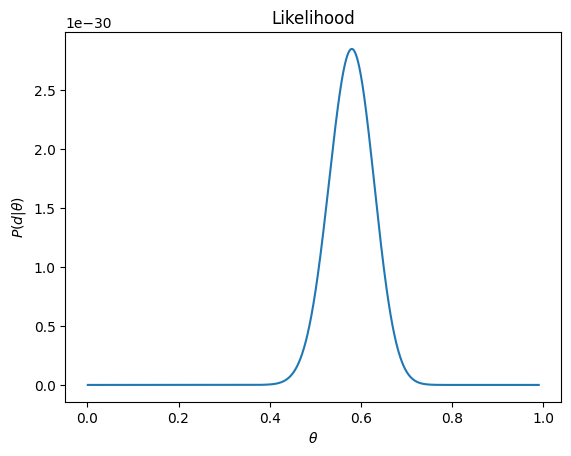

In [205]:
# YOUR ANSWERS HERE
def likelihood(d,theta):
    loglikelihood =(d*np.log(theta)+(1-d)*np.log(1.0-theta)).sum()
    return np.exp(loglikelihood)
# def likelihood(d,theta):
#     return bernoulli(p=theta).pmf(d).prod()

all_likelihood = np.array([likelihood(data,theta) for theta in thetas])
plt.plot(thetas,all_likelihood)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(d|\theta)$")
plt.title("Likelihood")

Does $P(d|\theta)$ normalized with respect to $\theta$? If not, try to normalized it. How can you interpret the meaning of normalized $P(d|\theta)$

Hint: Since
$$p(\theta | d) = \frac{P(d | \theta) P(\theta)}{\int P(d | \theta) P(\theta) \mathop{d \theta}}$$
If $P(\theta) = \mbox{constant}$ for all $\theta$, which is actually the uniform distribution, then  $P(\theta)$ can be cancelled out in the denominator and numerator, we will have
$$p(\theta | d) = \frac{P(d | \theta) }{\int P(d | \theta) \mathop{d \theta}}$$, and this is exactly the normalized likelihood. Therefore the normalized likelihood is actually the posterior with uniform prior. Alternatively, we can say that when we have uniform prior, the likelihood is actually identical to the posterior, so uniform prior is actually no prior.

Text(0.5, 1.0, 'normalized likelihood')

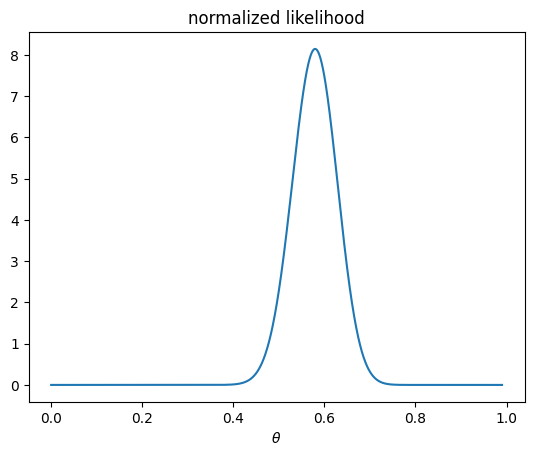

In [206]:
# YOUR ANSWERS HERE
delta_theta = thetas[1]-thetas[0]
norm = np.sum(all_likelihood*delta_theta)
normed_likelihood = all_likelihood/norm
plt.plot(thetas,normed_likelihood)
plt.xlabel(r"$\theta$")
# plt.ylabel(r"$P(d|\theta)$")
plt.title("normalized likelihood")

**Posterior**

Write a function that takes $d$ and $\theta$ as input and $P(\theta|d)$ as output.Then plot $P(\theta|d)$ against $\theta$ together with the normalized likelihood and prior.

Hint1: use the approximation $P(d)= \int P(d | \theta) P(\theta) \mathop{d \theta} \approx \sum_{j=1}^{N} P(d | \Delta_\theta*j) P(\Delta_\theta*j) \Delta_{\theta} $ to calculate the integral, where $N$ is a sufficiently large number.

Hint2: save the result of $P(d)= \int P(d | \theta) P(\theta) \mathop{d \theta}$, so that you don't need to re-calculate it when you need.

Text(0.5, 0, '$\\theta$')

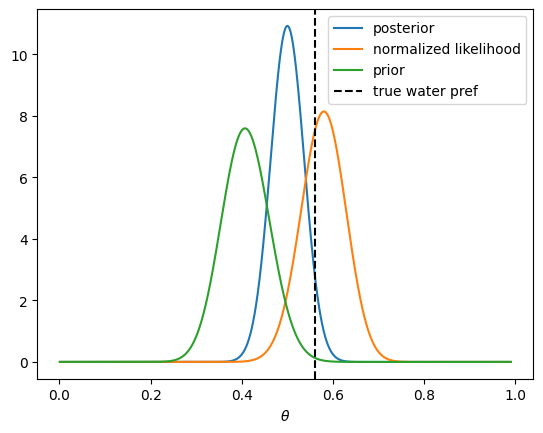

In [207]:
# YOUR ANSWERS HERE
def evidence(d,likelihood,prior,thetas=thetas):
    e = np.zeros_like(thetas)
    delta_theta = thetas[1]-thetas[0]
    for i,t in enumerate(thetas):
        e[i] = prior(t)*likelihood(d,t)*delta_theta
    return np.sum(e)

def posterior(d,theta,likelihood=likelihood,prior=prior,evidence=evidence,thetas=thetas,batch=False):
    if not batch:
        return likelihood(d,theta)*prior(theta)/evidence(d,likelihood,prior,thetas=thetas)
    else:
        ev = evidence(d,likelihood,prior,thetas=thetas)
        return np.array([likelihood(d,theta)*prior(theta)/ev for theta in thetas])


all_posterior = posterior(data,thetas,batch=True)
plt.plot(thetas,all_posterior,label="posterior")
plt.plot(thetas,normed_likelihood,label="normalized likelihood")
plt.plot(thetas,all_prior,label="prior")
plt.axvline(true_water_pref, linestyle="--", color="black", label="true water pref")
plt.legend()
plt.xlabel(r"$\theta$")